In [1]:
""" 훈련 데이터 생성 """

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 1, stratify = y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
from matplotlib.colors import ListedColormap

""" 시각화 함수 """
# 2차원 데이터셋의 결정 경계를 시각화
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02) :
    
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', ' v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도
    for idx, cl in enumerate(np.unique(y)) :
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx],
                   label = cl, edgecolor = 'black')
    
    # 테스트 샘플을 부각
    if test_idx : 
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1], c = '', edgecolor = 'black', alpha = 1.0,
                   linewidth = 1, marker = 'o', s = 100, label = 'test set')

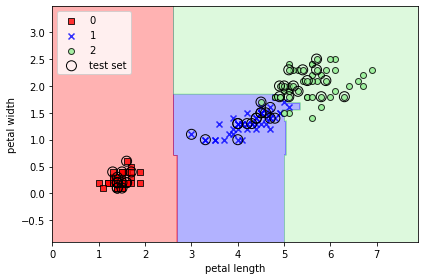

In [4]:
""" 랜덤 포레스트 학습 """
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'gini',
                               n_estimators = 25,
                               random_state = 1,
                               n_jobs = 2)
# n_jobs는 작업을 병렬화 하는 것으로, 다중 코어 사용을 원할 때 사용한다.

forest.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined,
                     y_combined,
                     classifier = forest,
                     test_idx = range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()